In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Supress the unnumbered hordes of warnings that make output completely unreadable
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
docword_column_names = ['docID', 'wordID', 'count']
docword_data = pd.read_csv('docword.kos.txt', delim_whitespace=True, header=None, names=docword_column_names)

In [3]:
docword_data.head()

,docID,wordID,count
0,3430,NaN,NaN
1,6906,NaN,NaN
2,353160,NaN,NaN
3,1,61.0,2.0
4,1,76.0,1.0


In [4]:
docword_data = docword_data.dropna(axis=0, how='any')
docword_data['wordID'] = docword_data['wordID'].astype('int')

In [5]:
docword_data.head()

,docID,wordID,count
3,1,61,2.0
4,1,76,1.0
5,1,89,1.0
6,1,211,1.0
7,1,296,1.0


In [6]:
df = docword_data.pivot(index='docID', columns='wordID', values='count')

In [7]:
df.head()

wordID,1,2,3,4,5,6,7,8,9,10,...,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906
docID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def sum_to_boolean(x):
    if x>=1:
        return True
    else:
        return False

df_final = df.applymap(sum_to_boolean)

In [9]:
df_final.head()

wordID,1,2,3,4,5,6,7,8,9,10,...,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906
docID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
import time
from mlxtend.frequent_patterns import fpgrowth

In [11]:
vocabularyFile = open("vocab.kos.txt", "r")
vocabulary = (vocabularyFile.read()).split('\n')

In [16]:
support = [0.35,0.3,0.25,0.2,0.15]

In [17]:
def frequent_method(i):
    print('\nmin_support = ',i)

    #Task1 : Compute Frequent Item Set using  mlxtend.frequent_patterns
    start_time = time.time()
    frequent = fpgrowth(df_final, min_support=i, use_colnames=True)
    atime = float(time.time() - start_time)
    print('\nTime to find frequent itemset')
    print("--- %s seconds ---", atime)

    itemset = frequent['itemsets'].values
    for i in range(len(itemset)):
            tempFrequentWordSet = []
    
            for frequentSet in itemset:
                tempWordSet = set()

                for wordIndex in list(frequentSet):
                    tempWordSet.add(vocabulary[wordIndex-1])
            
                tempFrequentWordSet.append(tempWordSet)
    fl = frequent['itemsets'].count()
    print("\nNumbers of all frequent itemsets: ", fl)
    print("\nAll frequent itemsets word: \n",tempFrequentWordSet)
    print("-------------------------------------------------------------------------------------------------------------\n")
    
    # Task 2&3: Find closed/max frequent itemset using frequent itemset found in task1
    su = frequent.support.unique()#all unique support count
    #Dictionay storing itemset with same support count key
    fredic = {}
    for i in range(len(su)):
        inset = list(frequent.loc[frequent.support ==su[i]]['itemsets'])
        fredic[su[i]] = inset
    #Dictionay storing itemset with  support count <= key
    fredic2 = {}
    for i in range(len(su)):
        inset2 = list(frequent.loc[frequent.support<=su[i]]['itemsets'])
        fredic2[su[i]] = inset2

    #Find Closed frequent itemset
    start_time = time.time()
    cl = []
    for index, row in frequent.iterrows():
        isclose = True
        cli = row['itemsets']
        cls = row['support']
        checkset = fredic[cls]
        for i in checkset:
            if (cli!=i):
                if(frozenset.issubset(cli,i)):
                    isclose = False
                    break
    
        if(isclose):
            cl.append(row['itemsets'])
            
    ctime = float(time.time() - start_time)    
    print('Time to find Close frequent itemset')
    print("--- %s seconds ---", ctime)
    print("\nNumbers of closed frequent itemsets: ", len(cl))

    itemset = cl
    for i in range(len(itemset)):
            tempFrequentWordSet = []
    
            for frequentSet in itemset:
                tempWordSet = set()

                for wordIndex in list(frequentSet):
                    tempWordSet.add(vocabulary[wordIndex-1])
            
                tempFrequentWordSet.append(tempWordSet)
                       
    print("\nClosed frequent itemsets word: \n", tempFrequentWordSet)
    print("-------------------------------------------------------------------------------------------------------------\n")
    
    #Find Max frequent itemset
    start_time = time.time()
    ml = []
    for index, row in frequent.iterrows():
        isclose = True
        cli = row['itemsets']
        cls = row['support']
        checkset = fredic2[cls]
        for i in checkset:
            if (cli!=i):
                if(frozenset.issubset(cli,i)):
                    isclose = False
                    break
    
        if(isclose):
            ml.append(row['itemsets'])
    
    mtime = float(time.time() - start_time)
    print('Time to find Max frequent itemset')
    print("--- %s seconds ---",mtime)
    print("\nNumbers of max frequent itemsets: ", len(ml))

    itemset = ml
    for i in range(len(itemset)):
            tempFrequentWordSet = []
    
            for frequentSet in itemset:
                tempWordSet = set()

                for wordIndex in list(frequentSet):
                    tempWordSet.add(vocabulary[wordIndex-1])
            
                tempFrequentWordSet.append(tempWordSet)
                       
    print("\nMax frequent itemsets word: \n", tempFrequentWordSet)
    print("___________________________________________________________________________________________________________\n")
    A_time.append(atime)
    A.append(frequent['itemsets'].count())
    C_time.append(ctime)
    C.append(len(cl))
    M_time.append(mtime)
    M.append(len(ml))
    



In [18]:
A_time = []
A = []
C_time = []
C = []
M_time = []
M = []
for i in support:
    frequent_method(i)


min_support =  0.35

Time to find frequent itemset
--- %s seconds --- 0.16674256324768066

Numbers of all frequent itemsets:  8

All frequent itemsets word: 
 [{'bush'}, {'general'}, {'kerry'}, {'war'}, {'house'}, {'democratic'}, {'poll'}, {'bush', 'general'}]
-------------------------------------------------------------------------------------------------------------

Time to find Close frequent itemset
--- %s seconds --- 0.0009965896606445312

Numbers of closed frequent itemsets:  8

Closed frequent itemsets word: 
 [{'bush'}, {'general'}, {'kerry'}, {'war'}, {'house'}, {'democratic'}, {'poll'}, {'bush', 'general'}]
-------------------------------------------------------------------------------------------------------------

Time to find Max frequent itemset
--- %s seconds --- 0.0

Numbers of max frequent itemsets:  6

Max frequent itemsets word: 
 [{'kerry'}, {'war'}, {'house'}, {'democratic'}, {'poll'}, {'bush', 'general'}]
_________________________________________________________

In [19]:
print(A_time)

[0.16674256324768066, 0.16276121139526367, 0.17569923400878906, 0.20989251136779785, 0.3697378635406494]


Text(0.5, 0, 'Support')

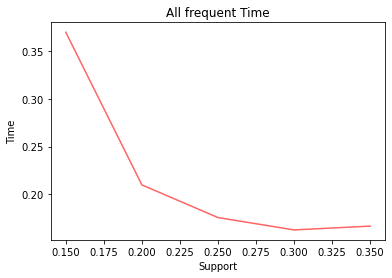

In [21]:
plt.plot(support,A_time,color=(255/255,100/255,100/255))
plt.title("All frequent Time") # title
plt.ylabel("Time") # y label
plt.xlabel("Support") # x label

Text(0.5, 0, 'Support')

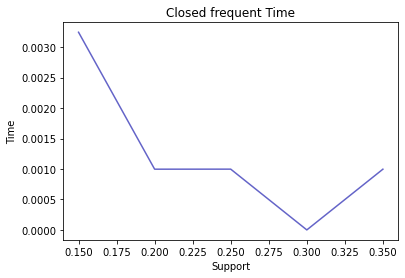

In [25]:
plt.plot(support,C_time,color=(100/255,100/255,200/255))
plt.title("Closed frequent Time") # title
plt.ylabel("Time") # y label
plt.xlabel("Support") # x label

Text(0.5, 0, 'Support')

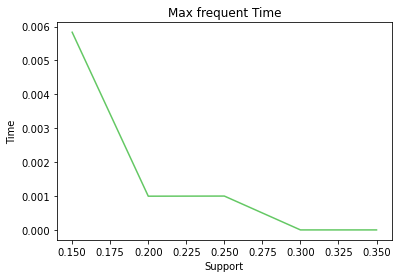

In [24]:
plt.plot(support,M_time,color=(100/255,200/255,100/255))
plt.title("Max frequent Time") # title
plt.ylabel("Time") # y label
plt.xlabel("Support") # x label

Text(0.5, 0, 'Support')

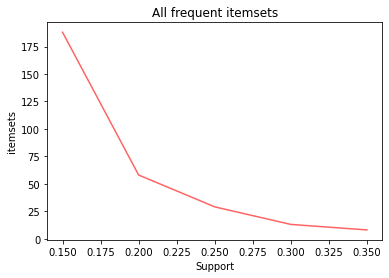

In [26]:
plt.plot(support,A,color=(255/255,100/255,100/255))
plt.title("All frequent itemsets") # title
plt.ylabel("itemsets") # y label
plt.xlabel("Support") # x label

Text(0.5, 0, 'Support')

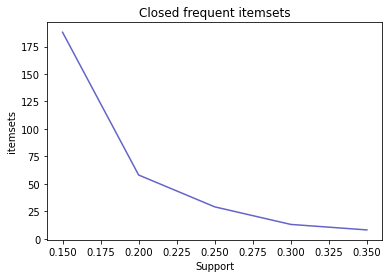

In [27]:
plt.plot(support,C,color=(100/255,100/255,200/255))
plt.title("Closed frequent itemsets") # title
plt.ylabel("itemsets") # y label
plt.xlabel("Support") # x label

Text(0.5, 0, 'Support')

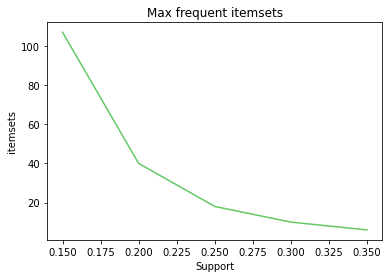

In [28]:
plt.plot(support,M,color=(100/255,200/255,100/255))
plt.title("Max frequent itemsets") # title
plt.ylabel("itemsets") # y label
plt.xlabel("Support") # x label